# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

# [作業目標]
- 仿造範例的資料操作, 試著進行指定的離群值處理

# [作業重點]
- 計算 AMT_ANNUITY 的分位點 (q0 - q100) (Hint : np.percentile, In[3])
- 將 AMT_ANNUITY 的 NaN 用中位數取代 (Hint : q50, In[4])
- 將 AMT_ANNUITY 數值轉換到 -1 ~ 1 之間 (Hint : 參考範例, In[5])
- 將 AMT_GOOD_PRICE 的 NaN 用眾數取代 (In[6])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './0.data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./0.data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. 列出 AMT_ANNUITY 的 q0 - q100
## 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
## 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
## 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補


In [6]:
# show all columns
[column for column in app_train.columns]

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [7]:
app_train.dtypes.isin([np.int64, np.float64])

SK_ID_CURR                     True
TARGET                         True
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 122, dtype: bool

In [8]:
num_columns = list(app_train.columns[list(app_train.dtypes.isin([np.int64, np.float64]))])

In [14]:
len(num_columns)

41

In [15]:
num_columns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Numbers of remain columns: 8


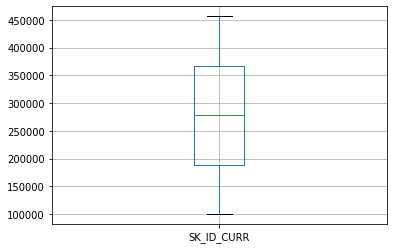

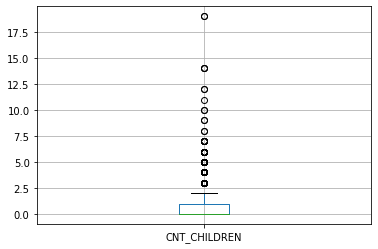

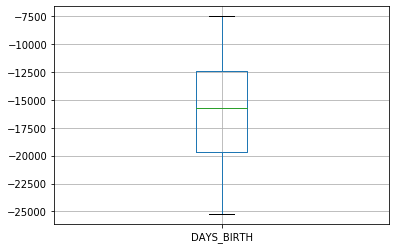

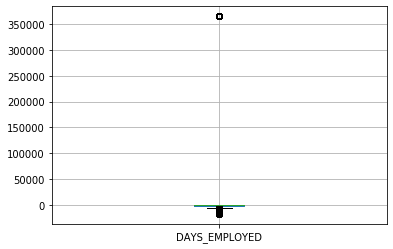

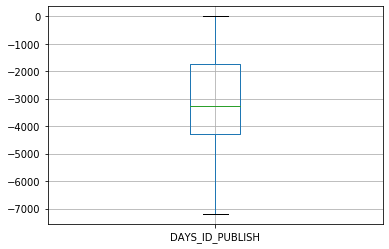

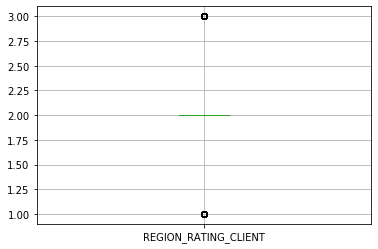

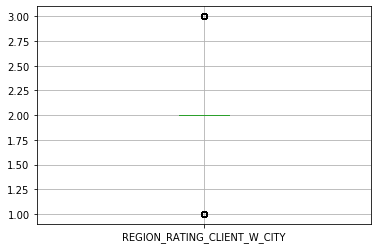

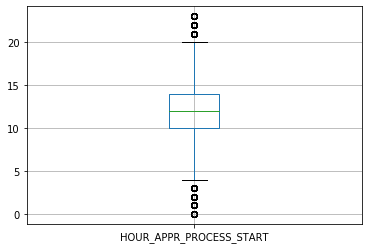

In [16]:
"""
YOUR CODE HERE
"""
# 先篩選數值型的欄位
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin([np.int64, np.float64]))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns: %i" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    app_train.boxplot(col)
    plt.show()

In [3]:
"""
YOUR CODE HERE
"""
# 1: 計算 AMT_ANNUITY 的 q0 - q100
# q_all = 

q_all = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in range(0,101)]
print(q_all)
pd.DataFrame({'q': list(range(101)),
              'value': q_all})

[1615.5, 6182.910000000001, 6750.0, 7875.0, 8703.0, 9000.0, 9000.0, 9553.5, 10125.0, 10503.0, 11074.5, 11430.0, 11970.0, 12375.0, 12838.5, 13302.0, 13500.0, 13500.0, 13896.0, 14350.5, 14701.5, 15124.5, 15583.5, 15970.5, 16209.0, 16524.0, 16852.5, 17109.0, 17487.0, 17806.5, 18189.0, 18643.5, 19102.5, 19417.5, 19836.0, 20151.0, 20421.0, 20853.0, 21186.0, 21609.0, 21865.5, 22018.5, 22342.5, 22527.0, 22972.5, 23346.0, 23719.5, 23931.0, 24259.5, 24583.589999999953, 24903.0, 25240.5, 25537.5, 25960.5, 26217.0, 26316.0, 26640.0, 26860.5, 27189.0, 27558.0, 28062.0, 28480.5, 28917.0, 29340.0, 29830.5, 30078.0, 30483.0, 30897.0, 31275.0, 31630.5, 32004.0, 32458.5, 32895.0, 33376.5, 33984.0, 34596.0, 35345.16000000005, 35806.5, 36328.5, 36747.0, 37516.5, 37948.5, 38556.0, 39456.0, 40135.5, 40806.0, 41845.5, 42790.5, 43735.5, 44991.0, 45954.0, 47254.5, 48465.0, 49878.0, 51745.5, 53325.0, 55624.5, 58482.0, 62964.0, 70006.5, 258025.5]


,q,value
0,0,1615.50
1,1,6182.91
2,2,6750.00
3,3,7875.00
4,4,8703.00
...,...,...
96,96,55624.50
97,97,58482.00
98,98,62964.00
99,99,70006.50


In [4]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

"""
Your Code Here
"""
q_50 = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 50)]
app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50

print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


In [5]:
q_50

[24903.0]

### Hints: Normalize function (to -1 ~ 1)
$ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

In [18]:
value = app_train['AMT_ANNUITY'].values

In [33]:
value = app_train['AMT_ANNUITY'].values
app_train['AMT_ANNUITY_NORMALIZED'] = (( value - min(value) )/( max(value) - min(value) )-0.5)
app_train['AMT_ANNUITY_NORMALIZED'] = app_train['AMT_ANNUITY_NORMALIZED']*2

In [ ]:
app_train['AMT_ANNUITY_NORMALIZED'] 

In [41]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())
value = app_train['AMT_ANNUITY'].values

def normalize_value(x):
    """
    Your Code Here, compelete this function
    """
    app_train['AMT_ANNUITY_NORMALIZED'] = (( value - min(value) )/( max(value) - min(value) )-0.5)
    app_train['AMT_ANNUITY_NORMALIZED'] = app_train['AMT_ANNUITY_NORMALIZED']*2
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()

== Original data range ==
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
== Normalized data range ==


count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64

In [34]:
app_train['AMT_ANNUITY_NORMALIZED'] 

0        -0.819937
1        -0.734152
2        -0.959951
3        -0.781046
4        -0.842050
            ...   
307506   -0.797648
307507   -0.918989
307508   -0.778764
307509   -0.855002
307510   -0.629484
Name: AMT_ANNUITY_NORMALIZED, Length: 307511, dtype: float64

In [19]:
type(value)

numpy.ndarray

In [24]:
p = ( value - min(value) )/( max(value) - min(value) )-0.5

In [25]:
p*2

array([-0.81993682, -0.73415233, -0.95995086, ..., -0.77876448,
       -0.85500176, -0.62948403])

In [47]:
# 3
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

# 列出重複最多的數值
"""
Your Code Here
"""
value_most = mode(app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE'])
print(value_most)

mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = mode_goods_price[0]

print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278
ModeResult(mode=array([450000.]), count=array([26022]))
After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0


In [45]:
# 計算眾數 (mode)
from scipy.stats import mode
import time

value_most = mode(app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE'])

In [46]:
value_most

ModeResult(mode=array([450000.]), count=array([26022]))

In [52]:
# 計算眾數 (mode)
# 較快速的方式
from collections import defaultdict

start_time = time.time()
mode_dict = defaultdict(lambda:0)

for value in app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE']:
    mode_dict[value] += 1
    
mode_get = sorted(mode_dict.items(), key=lambda kv: kv[1], reverse=True)
print(mode_get[0])
print("Elapsed time: %.3f secs" % (time.time() - start_time))

(450000.0, 26300)
Elapsed time: 0.317 secs


In [54]:
mode_get

[(450000.0, 26300),
 (225000.0, 25282),
 (675000.0, 24962),
 (900000.0, 15416),
 (270000.0, 11428),
 (180000.0, 10123),
 (454500.0, 9157),
 (1125000.0, 9050),
 (135000.0, 8206),
 (315000.0, 5225),
 (1350000.0, 5037),
 (679500.0, 4824),
 (238500.0, 4696),
 (360000.0, 4553),
 (247500.0, 4318),
 (463500.0, 3873),
 (540000.0, 3763),
 (495000.0, 3463),
 (202500.0, 3222),
 (90000.0, 3169),
 (405000.0, 2954),
 (472500.0, 2828),
 (157500.0, 2704),
 (585000.0, 2647),
 (337500.0, 2501),
 (229500.0, 2438),
 (112500.0, 2170),
 (630000.0, 2164),
 (1800000.0, 2146),
 (720000.0, 1922),
 (1575000.0, 1875),
 (688500.0, 1824),
 (292500.0, 1708),
 (148500.0, 1674),
 (477000.0, 1611),
 (810000.0, 1568),
 (67500.0, 1505),
 (697500.0, 1408),
 (765000.0, 1396),
 (382500.0, 1396),
 (904500.0, 1375),
 (283500.0, 1372),
 (252000.0, 1368),
 (234000.0, 1279),
 (45000.0, 1169),
 (945000.0, 1161),
 (855000.0, 1113),
 (1129500.0, 1109),
 (913500.0, 1065),
 (328500.0, 1059),
 (459000.0, 1023),
 (193500.0, 1007),
 (10